### Percentage of upazillas found programmatically

               types  total  tagged
0            Mugging    415     282
1            Robbery    457     414
2      Road Accident    698     609
3  Sexual Harassment    176     109
4              Theft    260     216


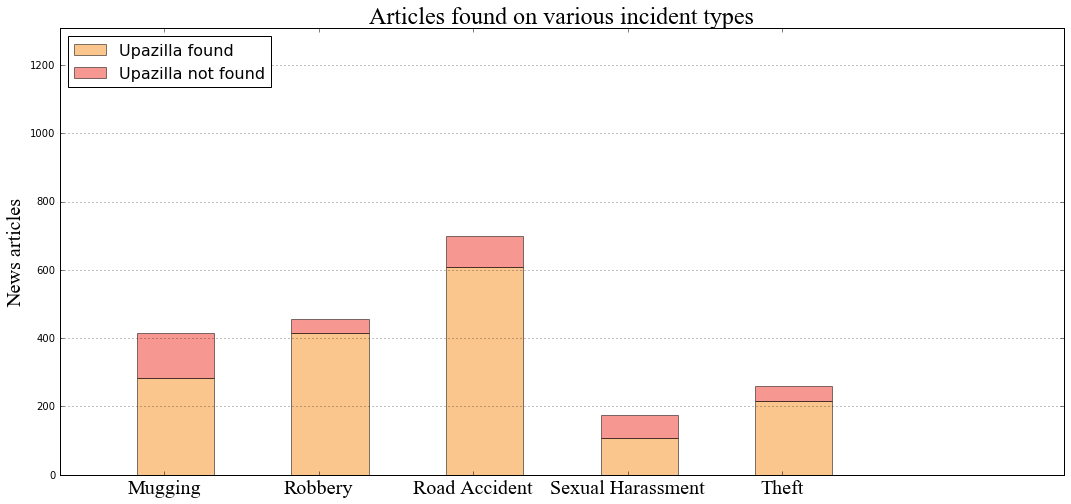

In [25]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
def draw_percentage_of_uz_found(stat_path):
    raw_data = { 'types': [], 'total': [], 'tagged': []}
    with open(stat_path, 'r') as file:
        lines = file.readlines()[2:]
        #print('\n'.join(lines))
        for line in lines:
            words = line.strip().split()
            word = words[1].replace('-', ' ').title()
            if word not in raw_data['types']:
                raw_data['types'].append(word)
                raw_data['total'].append(0)
                raw_data['tagged'].append(0)
            index = raw_data['types'].index(word)
            raw_data['total'][index] += int(words[2])
            raw_data['tagged'][index] += int(words[3])
    #print(raw_data)
    '''display the graph'''
    df = pd.DataFrame(raw_data, columns = ['types', 'total', 'tagged'])
    print(df)
    fsize = 20
    font = {'fontname':'Times New Roman'}
    pos = list(range(len(df['total'])))
    width = 0.5

    # Plotting the bars
    fig, ax = plt.subplots(figsize=(18, 8))

    # Create a bar with total data,
    # in position pos,
    plt.bar(pos,
            #using df['pre_score'] data,
            df['tagged'],
            # of width
            width,
            # with alpha 0.5
            alpha=0.5,
            # with color
            color='#F78F1E',
            # with label the first value in first_name
            label=df['types'][1])

    # Create a bar with tagged data,
    # in position pos + some width buffer,
    plt.bar(pos,
            #using df['mid_score'] data,
            [df['total'][i]-df['tagged'][i] for i in range(len(df['types']))],
            # of width
            width,
            # with alpha 0.5
            alpha=0.5,
            # with color
            color='#EE3224',
            # with label the second value in first_name
            label=df['types'][0],
            bottom = df['tagged']
           )

    # Set the y axis label
    ax.set_ylabel('News articles', fontsize = fsize, **font)

    # Set the chart's title
    ax.set_title('Articles found on various incident types', fontsize = fsize + 4, **font)

    # Set the position of the x ticks
    ax.set_xticks([p + 0.35 * width for p in pos])

    # Set the labels for the x ticks
    ax.set_xticklabels(df['types'], fontsize = fsize, **font)

    # Setting the x-axis and y-axis limits
    plt.xlim(min(pos)-width, max(pos)+width*4)
    plt.ylim([0, max(df['total'] + df['tagged'])] )

    # Adding the legend and showing the plot
    plt.legend(['Upazilla found', 'Upazilla not found'],
               loc='upper left',
              fontsize = fsize - 4)
    plt.grid(axis='y')
    #plt.show()
    plt.savefig('D:/Sachetan/Newscrawl/Step_3/Upazilla_finding_results.png')
    return

stat_path = 'D:/Sachetan/Newscrawl/Step_3/stats.txt'
draw_percentage_of_uz_found(stat_path)

### Monthly rate of incidents

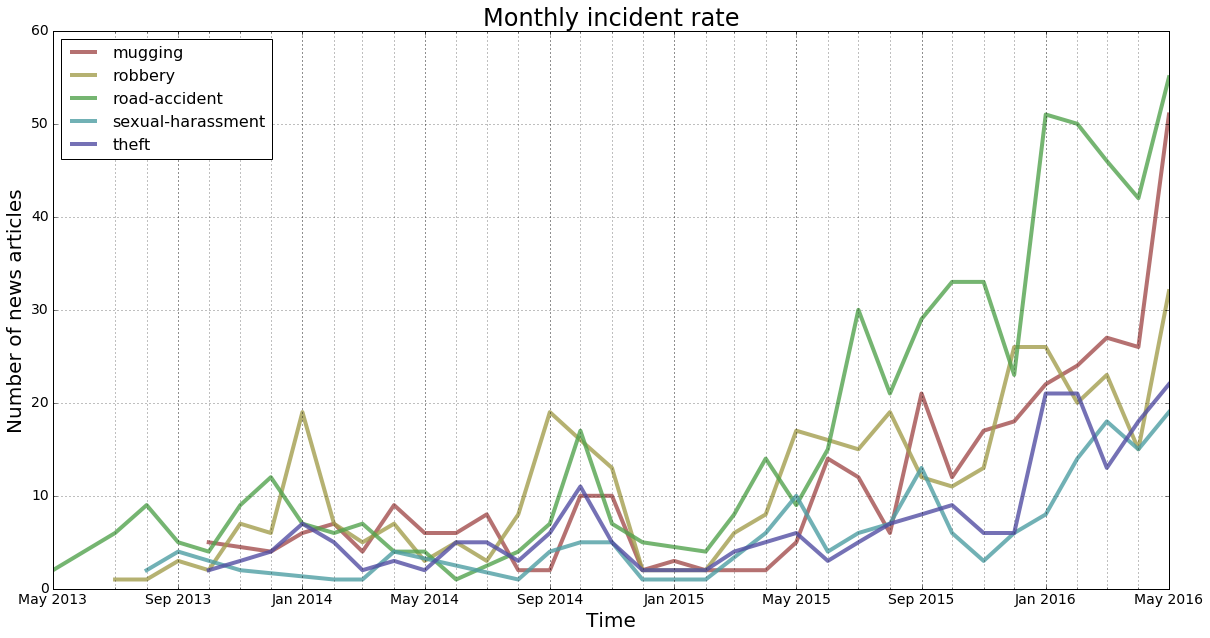

In [214]:
%matplotlib inline
import datetime
import random
from collections import defaultdict
import matplotlib.pyplot as plt
import numpy as np
def draw_incident_rate(root_path, newspapers, types, stop = '2016-06-01'):
    data = {}
    stopdate = datetime.datetime.strptime(stop, '%Y-%m-%d')
    for t in types:
        data[t] = []
        for n in newspapers:
            path = root_path + '/' + n + '_' + t + '_step-3-tagged.txt'
            with open(path, 'r', encoding = 'utf-8') as file:
                lines = file.readlines()
                for i in range(5, len(lines), 8):
                    strdate = lines[i].strip()
                    date = datetime.datetime.strptime(strdate, '%Y-%m-%d')
                    if date < stopdate:
                        data[t].append(date)
    '''Plot the results'''
    fsize = 20
    alldates = set()
    fig, ax = plt.subplots(figsize=(20, 10))                
    for i in range(len(types)):
        test = sorted(data[types[i]])
        date_markers = []
        counts = []
        for date in test:
            startdate = datetime.datetime(date.year, date.month, 1)
            if startdate not in date_markers:
                date_markers.append(startdate)
                alldates.add(startdate)
                counts.append(0)
            counts[date_markers.index(startdate)] += 1  
        color = get_color(i)
        line, = plt.plot_date(x = date_markers, y= counts, fmt = 'r-')
        plt.setp(line, color = color, alpha=0.8, linewidth = 4.0)
    ax.tick_params(axis = 'both', which = 'minor', labelsize = 0)
    ax.set_xticks(sorted(list(alldates)), minor = True)
    for tick in ax.xaxis.get_major_ticks():
        tick.label.set_fontsize(fsize - 6)
    for tick in ax.yaxis.get_major_ticks():
        tick.label.set_fontsize(fsize - 6)
    plt.title("Monthly incident rate", fontsize = fsize + 4)
    plt.xlabel("Time",  fontsize = fsize)
    plt.ylabel("Number of news articles",  fontsize = fsize)
    plt.grid(which='both')
    plt.legend(types, loc='upper left', fontsize = fsize - 4)
    plt.savefig('D:/Sachetan/Newscrawl/Step_3/Monthly_incident_rate.png')
    plt.show()
    return

def get_color(i):
    colors = ['#a34e4e', '#a39e4e', '#53a34e', '#4e9ea3', '#524ea3']
    return colors[i]

root_path = 'D:/Sachetan/Newscrawl/Step_3'
newspapers = ['prothom_alo', 'bhorer_kagoj']
types = ['mugging', 'robbery', 'road-accident', 'sexual-harassment', 'theft']
draw_incident_rate(root_path, newspapers, types)

### Upazilla wise incident statistics

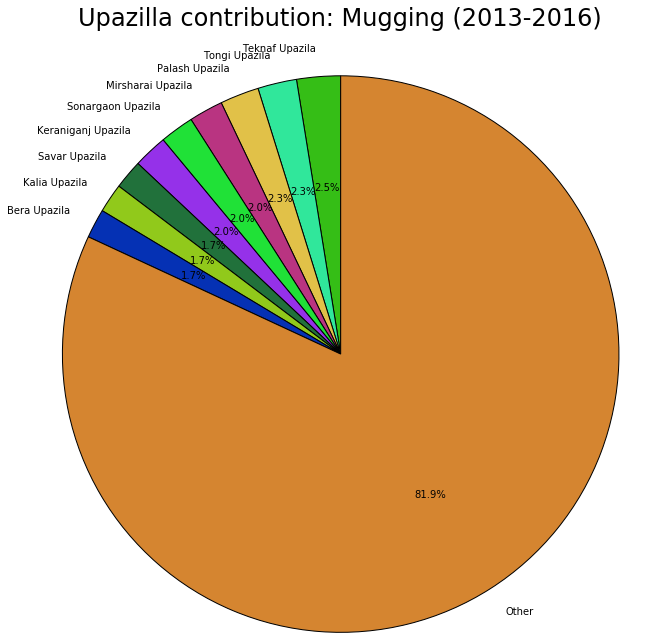

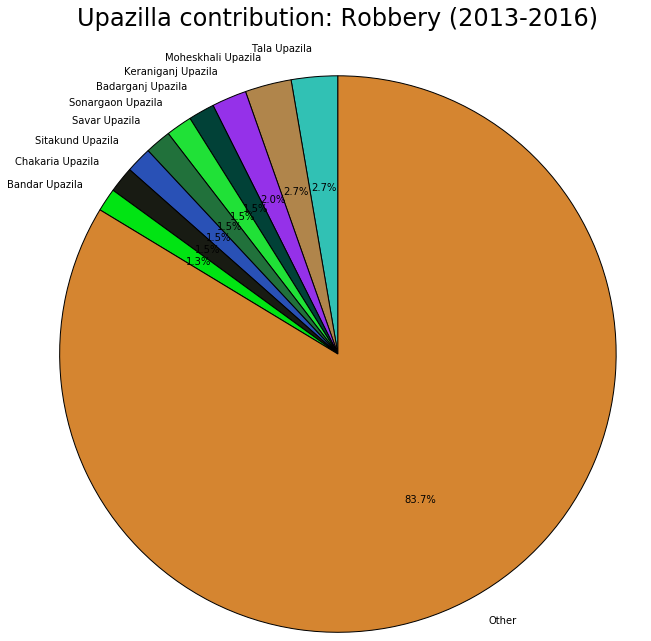

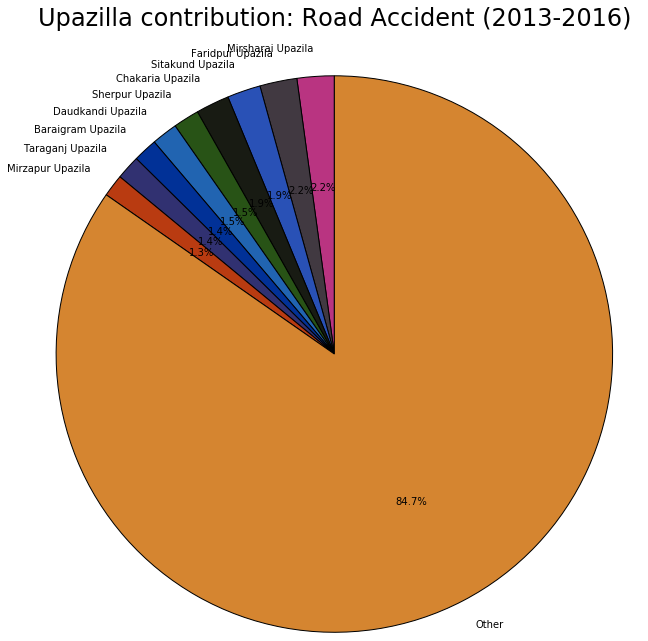

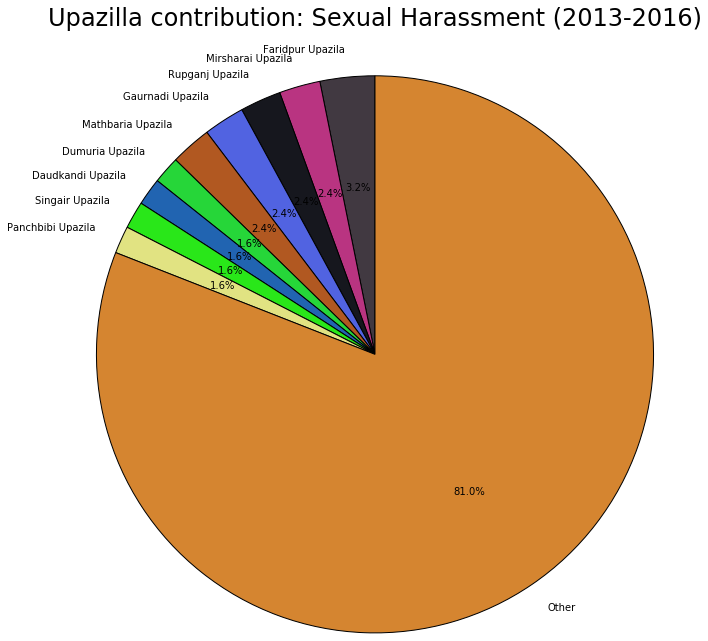

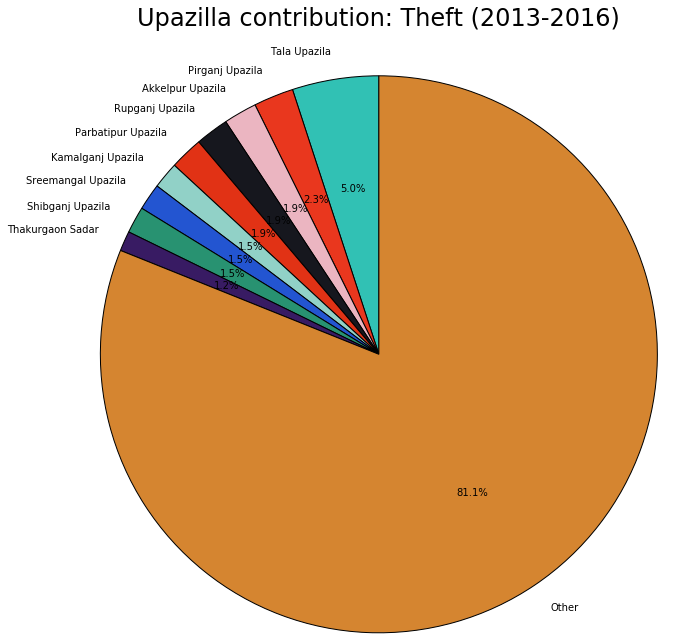

In [241]:
%matplotlib inline
from collections import defaultdict
import matplotlib.pyplot as plt
import numpy as np

class Upazilla:
    '''Model class for Upazilla'''
    def __str__(self):
        return (upazilla.upazilla_name_en + '/'
               +upazilla.upazilla_name_bn + ','
               +upazilla.zilla_name_en + '/'
               +upazilla.zilla_name_bn)
    pass

def draw_upazilla_pie(root_path, newspapers,  types, upazillas, startyear, stopyear):
    startdate =  datetime.datetime.strptime(str(startyear) + '-01-01', '%Y-%m-%d')
    stopdate =  datetime.datetime.strptime(str(stopyear) + '-12-31', '%Y-%m-%d')
    upazilla_list = [u.upazilla_name_en for u in upazillas]
    for t in types:
        incident_count = defaultdict(int)
        for n in newspapers:
            path = root_path + '/' + n + '_' + t + '_step-3-tagged.txt'
            with open(path, 'r', encoding = 'utf-8') as file:
                lines = file.readlines()
                for i in range(3, len(lines), 8):
                    date = datetime.datetime.strptime(lines[i+2].strip(), '%Y-%m-%d')
                    if date < startdate or date > stopdate:
                        continue
                    article_uz = lines[i][4:].strip().split(', ')
                    if article_uz == ['']:
                        continue
                    for u in article_uz:
                        incident_count[u] += 1
        uz_found = []
        uz_count = []
        fsize = 20
        i = 0
        other = 0
        for k in sorted(incident_count, key = incident_count.get, reverse=True):
            if i < 9:
                uz_found.append(k)
                uz_count.append(incident_count[k])
                #print(k + ': ' + str(incident_count[k]))
                i += 1
            else:
                other += incident_count[k]
        uz_found.append('Other')
        uz_count.append(other)
        fig, ax = plt.subplots(figsize=(11, 10))  
        plt.pie(uz_count, labels=uz_found, colors=[get_color_from_text(text) for text in uz_found],
                autopct='%1.1f%%', startangle=90)
        plt.axis('equal')
        plt.title('Upazilla contribution: ' + t.replace('-',' ').title() + ' (' + startyear + '-' + stopyear + ')'
                  , y=1.08, fontsize = fsize + 4)
        plt.savefig('D:/Sachetan/Newscrawl/Step_3/Upazilla_contribution_' + t + '.png')
        plt.show()
    return

def get_upazillas(input_handle):
    '''Returns a list of all upazillas'''
    upazillas = []
    with open(input_handle, 'r', encoding="utf8") as file:
        lines = file.readlines()
    for i in range(len(lines)):
        line = lines[i]
        if i == 0:
            line = line[1:]
        text = line.split(',')
        upazilla = Upazilla()
        upazilla.upazilla_name_en = text[0]
        upazilla.upazilla_name_bn = text[1]
        upazilla.zilla_name_en = text[2]
        upazilla.zilla_name_bn = text[3][:-1] # stray newline character
        upazillas.append(upazilla)
    return upazillas

def get_color_from_text(text):
    letters = '0123456789ABCDEF'
    return '#' + ''.join(letters[(ord(t)-96) % 15] for t in text[:6]) + ''.join('0' for i in range(6-len(text)))

root_path = 'D:/Sachetan/Newscrawl/Step_3'
newspapers = ['prothom_alo', 'bhorer_kagoj']
types = ['mugging', 'robbery', 'road-accident', 'sexual-harassment', 'theft']
upazilla_file_handle = 'D:/Sachetan/Newscrawl/201314upazilawithzila_charfixed.txt'
startyear = '2013'
endyear = '2016'
draw_upazilla_pie(root_path, newspapers, types, get_upazillas(upazilla_file_handle), startyear, endyear)

### Write incident locations to file

In [16]:
import json
def write_heatmap_data(root_path, types, newspapers, geocoded_upazila_handle):
    with open(geocoded_upazila_handle, 'r') as infile:
        data = json.loads(infile.read())
    for t in types:
        for n in newspapers:
            path = root_path + '/' + n + '_' + t + '_step-3-tagged.txt'
            with open(path, 'r', encoding = 'utf-8') as file:
                lines = file.readlines()
                for i in range(3, len(lines), 8):
                    article_uz = lines[i][4:].strip()
                    if article_uz == '':
                        continue
                    article_uz_list = article_uz.split(', ')
                    #print(article_uz_list)
                    found = False
                    for uz in article_uz_list:
                        for obj in data['upazillas']:
                            print(obj['results'][0]['address_components'][0]['long_name'])
                            #if uz == obj['results'][0]['address_components'][0]['long_name']:
                            #    found = True
                                #print(obj['results'][0]['geometry']['location'])
                    if not found:
                        print('Oops!')

geocoded_upazila_handle = 'D:/Sachetan/Newscrawl/Step_3/googlemap_depictions/upazila_geocode_pretty.txt'
root_path = 'D:/Sachetan/Newscrawl/Step_3'
newspapers = ['prothom_alo', 'bhorer_kagoj']
types = ['mugging', 'robbery', 'road-accident', 'sexual-harassment', 'theft']
write_heatmap_data(root_path, types, newspapers, geocoded_upazila_handle)

Godagari Upazila
Bhola
Swarupkathi
Bochaganj Upazila
Baliadangi Upazila
Chaugachha Upazila
Chhagalnaiya
Fulbaria
Bakerganj Upazila
Parbatipur Upazila
Ramgarh Upazila
Moheskhali Upazila
Santhia Upazila
Dhanbari
Shibpur
Tongi Bypass Road
Madan
Sreemangal
Bagmara Upazila
Dohar Upazila
Tahirpur
Kalukhali Bridge
Phulbari Upazila
Sapahar
Hathazari
Adamdighi
Magura
Gangni Upazila
Narayanganj
Kanaighat Upazila
Sreepur Upazila
Rupganj
Chuadanga Sadar Upazila
Old Rupsa Bagerhat Road
Rangunia
Gazaria Upazila
Palashbari
Atpara
Dhupchanchia Upazila
Kaukhali Upazila
Saltha
Mujibnagar
Wazirpur Upazila
Boda Upazila
Alikadam Upazila
Barlekha
Kalkini
Nachole
Faridpur
Amtali Upazila
Kawkhali Upazila
Sunamganj
Sylhet Sadar Upazila
Sadar Road
Begumganj
Rajnagar Upazila
Jhalokati
Meghna Upazila
Fulchhari
Belabo
Matlab Uttar Upazila
Mahalchhari Upazila
Karimganj Upazila
Kotchandpur Upazila
Manikchhari Upazila
Sariakandi Upazila
Chatkhil
Shaistaganj
Mithapukur Upazila
Mymensingh
Kaliakair
Taraganj Upazila
Jib

IndexError: list index out of range

### Bangladesh Police Crime data

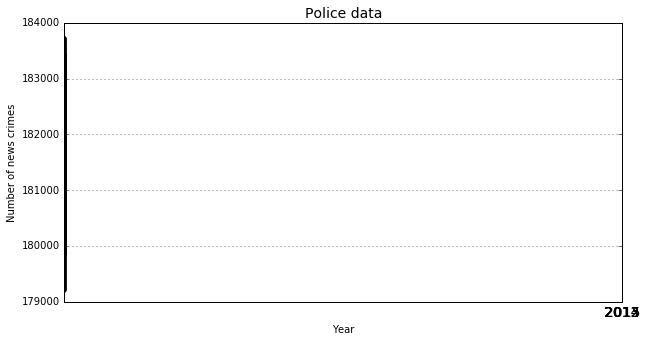

In [50]:
%matplotlib inline
import datetime
import random
from collections import defaultdict
import matplotlib.pyplot as plt
import numpy as np
def draw_police_crime_data():
    xdata = ['2012', '2013', '2014', '2015']
    ydata = [183407, 179199, 183729, 179880]
    '''Plot the results'''
    fsize = 10
    alldates = set()
    fig, ax = plt.subplots(figsize=(10, 5))                
    line, = plt.plot_date(x = range(len(ydata)), y = ydata, fmt = 'r-')
    plt.setp(line, color = '#000000', linewidth = 4.0)
    ax.set_xticks(xdata)
    for tick in ax.xaxis.get_major_ticks():
        tick.label.set_fontsize(fsize +4)
    plt.title("Police data", fontsize = fsize + 4)
    plt.xlabel("Year",  fontsize = fsize)
    plt.ylabel("Number of news crimes",  fontsize = fsize)
    plt.grid(which='both')
    plt.savefig('D:/Sachetan/Newscrawl/Step_3/police_data.png')
    plt.show()
    return

draw_police_crime_data()